### Importing the required Libraries

In [98]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset 

In [99]:
data = pd.read_csv("WineQT.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [100]:
data = data.drop("Id",axis = 1)

In [101]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [103]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [104]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Data Visualization 

In [105]:
plt.style.use('seaborn')

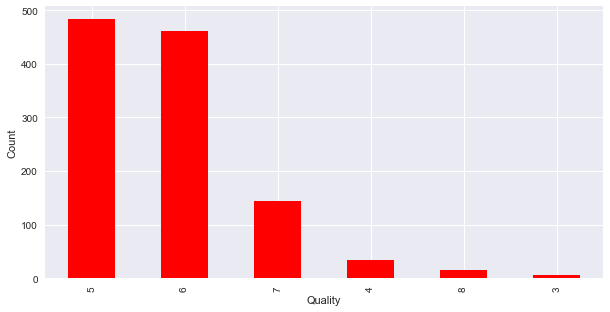

In [106]:
data["quality"].value_counts().plot(kind="bar" , color ="red" , figsize=(10,5));
plt.xlabel("Quality");
plt.ylabel("Count");

> Univariate basically tells us how data in each feature is distributed and also tells us about central tendencies like mean, median, and mode.

In [107]:
def plot_feat(feature):
    plt.figure(figsize=(7,5));
    feature.hist();
    plt.title(f"{feature.name} histogramic representation",fontdict={'fontsize':10});
    plt.ylabel("Frequency")

In [108]:
names = data.columns
names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

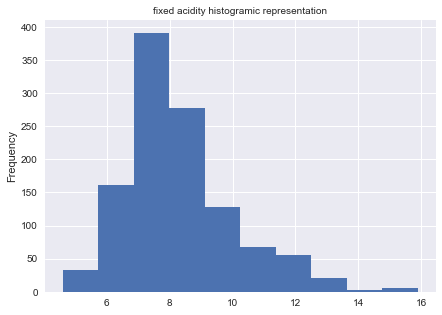

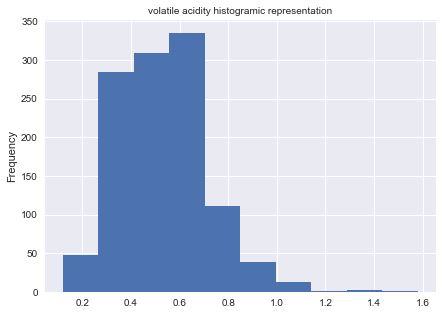

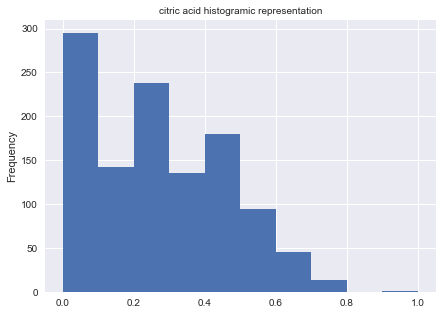

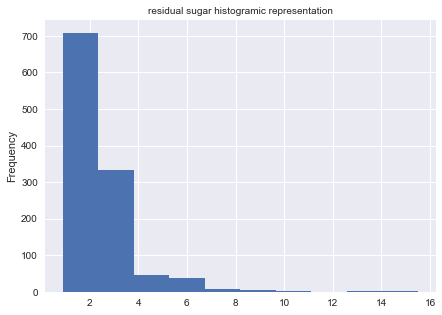

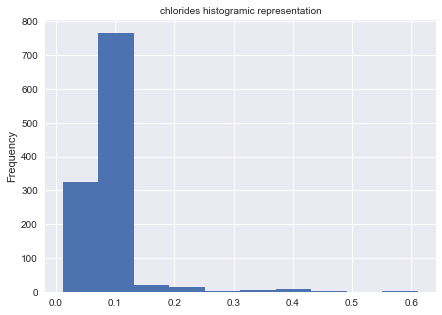

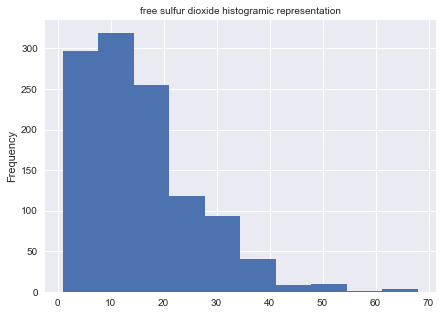

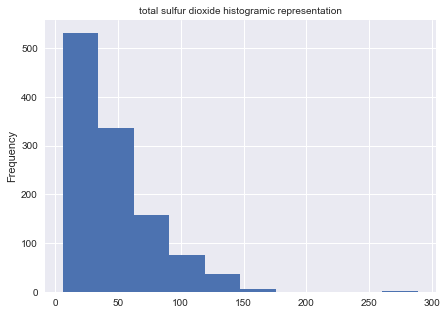

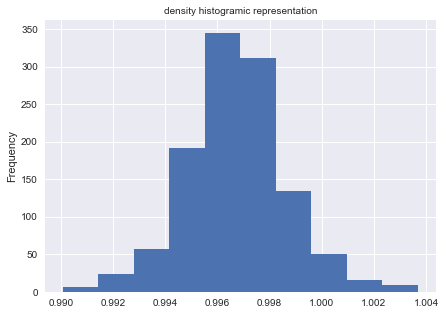

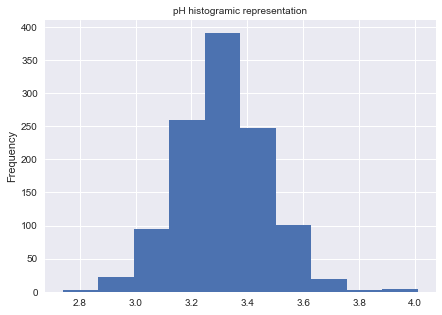

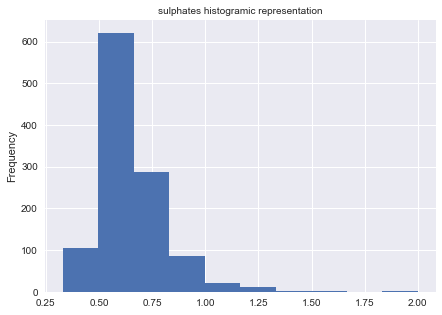

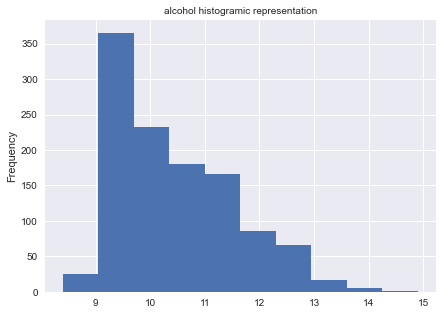

In [109]:
for val in names[:-1]:
    plot_feat(data[val])

In [110]:
def plot(feature1 , feature2):
    plt.figure(figsize=(15,5))
    
    plt.scatter(feature1[data["quality"]==3], 
                feature2[data["quality"]==3],
                c= "blue");

    plt.scatter(feature1[data["quality"]==4], 
                feature2[data["quality"]==4],
                c= "green");

    plt.scatter(feature1[data["quality"]==5], 
                feature2[data["quality"]==5],
                c= "red");

    plt.scatter(feature1[data["quality"]==6], 
                feature2[data["quality"]==6],
                c= "pink");

    plt.scatter(feature1[data["quality"]==7], 
                feature2[data["quality"]==7],
                c= "orange");
    
    plt.title("{} vs {}".format(feature1.name,feature2.name),fontdict={'fontweight':'bold','fontsize':15})
    plt.xlabel(feature1.name)
    plt.ylabel(feature2.name)
    plt.legend(["3","4","5","6","7"])

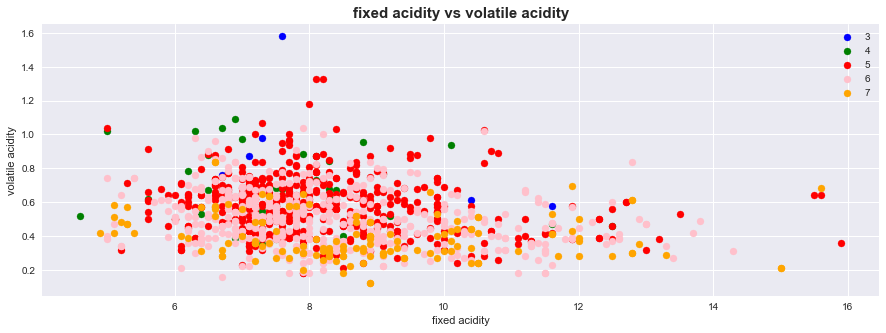

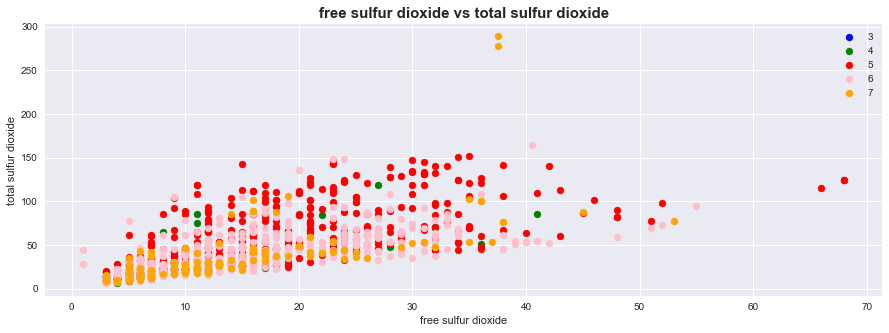

In [111]:
plot(data["fixed acidity"],data["volatile acidity"])

plot(data["free sulfur dioxide"],data["total sulfur dioxide"])

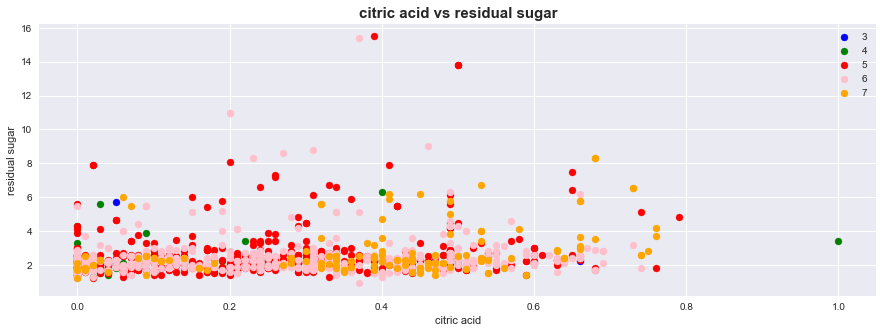

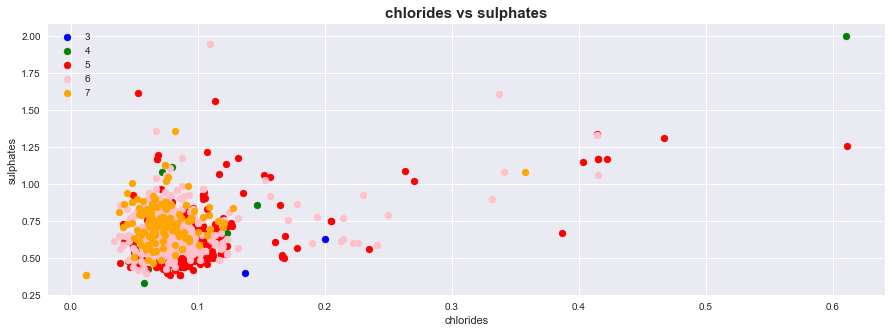

In [112]:
plot(data["citric acid"],data["residual sugar"])

plot(data["chlorides"],data["sulphates"])

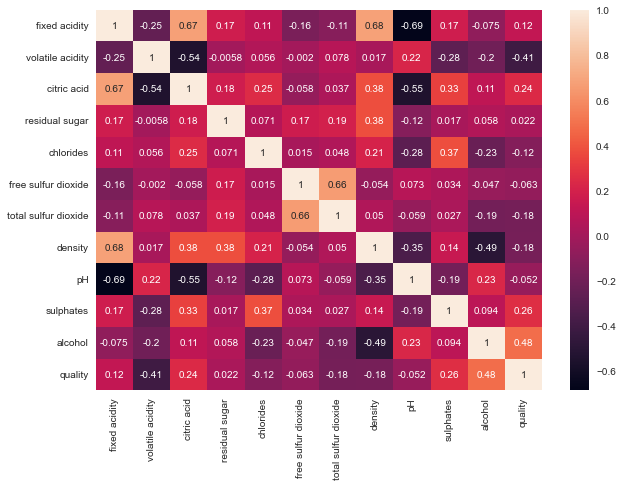

In [113]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True);

### Model Building

In [114]:
data.shape

(1143, 12)

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# create the features and label 
X = data.drop("quality",axis = 1)
y = data["quality"]

np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [116]:
print(f"shape of X_train ->{X_train.shape}")
print(f"shape of X_test ->{X_test.shape}")
print(f"shape of y_train ->{y_train.shape}")
print(f"shape of y_test ->{y_test.shape}")

shape of X_train ->(914, 11)
shape of X_test ->(229, 11)
shape of y_train ->(914,)
shape of y_test ->(229,)


In [117]:
def model_evalution(model, X_train , X_test, y_train,y_test):
    np.random.seed(42)
    print("Starting.....")
    model.fit(X_train,y_train)
    print("**********************************")
    print("Model building process is started ...")
    mod = model.fit(X_train, y_train)
    mod_pred = model.predict(X_test)
    print("Model creation process is done ...")
    
    print("**********************************")
    print("Evaluation of the Model")
    print("***********************************")
    
    print("Classification report of the model \n",classification_report(y_test,mod_pred))
    print("Confusion matrix of the model \n",confusion_matrix(y_test,mod_pred))
    print("Accuracy score of the model \n",accuracy_score(y_test,mod_pred))
    
    print("Evaluation process is done ...")
    
    print("***********************************************")

In [118]:
reg = RandomForestClassifier()
model_evalution(reg,X_train,X_test,y_train,y_test)

Starting.....
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the model 
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.80      0.75        96
           6       0.66      0.65      0.65        99
           7       0.77      0.65      0.71        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.43      0.42      0.42       229
weighted avg       0.67      0.69      0.68       229

Confusion matrix of the model 
 [[ 0  3  3  0  0]
 [ 0 77 19  0  0]
 [ 0 30 64  5  0]
 [ 0  0  9 17  0]
 [ 0  0  2  0  0]]
Accuracy score of the model 
 0.6899563318777293
Evaluation process is done ...
***********************************************


In [119]:
svc = SVC()
model_evalution(svc,X_train,X_test,y_train,y_test)

Starting.....
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the model 
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.43      0.54        96
           6       0.51      0.88      0.64        99
           7       1.00      0.04      0.07        26
           8       0.00      0.00      0.00         2

    accuracy                           0.56       229
   macro avg       0.45      0.27      0.25       229
weighted avg       0.64      0.56      0.51       229

Confusion matrix of the model 
 [[ 0  2  4  0  0]
 [ 0 41 55  0  0]
 [ 0 12 87  0  0]
 [ 0  1 24  1  0]
 [ 0  0  2  0  0]]
Accuracy score of the model 
 0.5633187772925764
Evaluation process is done ...
***********************************************


In [120]:
k_neigh = KNeighborsClassifier()
model_evalution(k_neigh,X_train,X_test,y_train,y_test)

Starting.....
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the model 
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.53      0.71      0.61        96
           6       0.50      0.43      0.46        99
           7       0.54      0.27      0.36        26
           8       0.00      0.00      0.00         2

    accuracy                           0.52       229
   macro avg       0.31      0.28      0.29       229
weighted avg       0.50      0.52      0.50       229

Confusion matrix of the model 
 [[ 0  4  2  0  0]
 [ 1 68 27  0  0]
 [ 0 50 43  6  0]
 [ 0  5 13  7  1]
 [ 0  1  1  0  0]]
Accuracy score of the model 
 0.5152838427947598
Evaluation process is done ...
***********************************************
